<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/1014_HW_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류 실습 - 캐글 산탄데르 고객 만족 예측**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

# load data
cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


## **데이터 전처리**

In [ ]:
# 실수형 111개, 정수형 260개, Null 값 없음
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format(unsatisfied_cnt/total_cnt))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3 칼럼의 min값 -999999

- NaN이나 특정 예외 값을 -999999로 변환했을 것

In [ ]:
# -999999 값이 116개가 있음
print(cust_df.var3.value_counts()[:10])

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: count, dtype: int64


In [ ]:
# var3의 -999999값을 최빈값인 2로 대체
cust_df['var3'].replace(-999999, 2, inplace=True)

# ID 변수 drop
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트, 레이블 세트 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape: {0:}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

# 비대칭한 데이터 세트이므로 Target 값 분포가 고르게 분리되었는지 확인
train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [ ]:
# XGBoost의 조기 중단의 검증 데이터 세트로 사용하기 위해 검증 데이터 세트 생성

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

## **XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators=500, early_stopping_rounds = 100
xgb_clf = XGBClassifier(n_estimators=500, early_stopping_rounds=100, random_state=156, eval_metric='auc')

# 학습
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr,y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.84325	validation_1-auc:0.81272
[2]	validation_0-auc:0.85238	validation_1-auc:0.82054
[3]	validation_0-auc:0.85885	validation_1-auc:0.82448
[4]	validation_0-auc:0.86337	validation_1-auc:0.82670
[5]	validation_0-auc:0.86731	validation_1-auc:0.82955
[6]	validation_0-auc:0.87131	validation_1-auc:0.83015
[7]	validation_0-auc:0.87557	validation_1-auc:0.82932
[8]	validation_0-auc:0.87886	validation_1-auc:0.82959
[9]	validation_0-auc:0.88170	validation_1-auc:0.82988
[10]	validation_0-auc:0.88332	validation_1-auc:0.83028
[11]	validation_0-auc:0.88501	validation_1-auc:0.83066
[12]	validation_0-auc:0.88745	validation_1-auc:0.83195
[13]	validation_0-auc:0.88881	validation_1-auc:0.83245
[14]	validation_0-auc:0.89095	validation_1-auc:0.83252
[15]	validation_0-auc:0.89251	validation_1-auc:0.83269
[16]	validation_0-auc:0.89494	validation_1-auc:0.83228
[17]	validation_0-auc:0.89554	validation_1-auc:0.83205
[18]	validation_0-au

테스트 데이터 세트로 예측 시 ROC AUC : 0.8410

In [ ]:
# HyperOpt 이용, 베이지안 최적화 기반으로 XGBoost 하이퍼 파라미터 튜닝 수행
from hyperopt import hp

xgb_search_space = {'max_depth' : hp.quniform('max_depth',5,15,1),
                    'min_child_weight' : hp.quniform('min_child_weight',1,6,1),
                    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate' : hp.uniform('learning_rate',0.01,0.2)}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 (-1)*roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, early_stopping_rounds=30, eval_metric='auc', max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])

    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping : 30회, XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출 후 roc-auc 계산, 평균 roc-auc 계산을 위해 list에 결과값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되, -1을 곱한 뒤 반환
    return -1*np.mean(roc_auc_list)

fmin() 함수를 호출해 max_eval=50회 만큼 반복하면서 최적의 하이퍼 파라미터 도출 (30분 이상 소요)

In [ ]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수 호출, max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
'''
best = fmin(fn=objective_func, space=xgb_search_space, algo=tpe.suggest,
            max_evals=50, trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)
'''

# 코드 실행이 1시간 이상 소요될 것으로 예상되어 실행 생략함

[0]	validation_0-auc:0.83957	validation_1-auc:0.80318
[1]	validation_0-auc:0.83371	validation_1-auc:0.79844
[2]	validation_0-auc:0.84400	validation_1-auc:0.81222
[3]	validation_0-auc:0.84852	validation_1-auc:0.81642
[4]	validation_0-auc:0.85016	validation_1-auc:0.81886
[5]	validation_0-auc:0.85289	validation_1-auc:0.82309
[6]	validation_0-auc:0.85076	validation_1-auc:0.82036
[7]	validation_0-auc:0.85261	validation_1-auc:0.82140
[8]	validation_0-auc:0.85317	validation_1-auc:0.82133
[9]	validation_0-auc:0.85104	validation_1-auc:0.82051
[10]	validation_0-auc:0.85432	validation_1-auc:0.82234
[11]	validation_0-auc:0.85704	validation_1-auc:0.82550
[12]	validation_0-auc:0.85616	validation_1-auc:0.82532
[13]	validation_0-auc:0.85601	validation_1-auc:0.82429
[14]	validation_0-auc:0.85444	validation_1-auc:0.82230
[15]	validation_0-auc:0.85802	validation_1-auc:0.82584
[16]	validation_0-auc:0.86099	validation_1-auc:0.82721
[17]	validation_0-auc:0.86028	validation_1-auc:0.82637
[18]	validation_0-au

KeyboardInterrupt: 

In [ ]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습/예측 수행
'''
xgb_clf = XGBClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc',
                        learning_rate = round(best['learning_rate'],5),
                        max_depth=int(best['max_depth']),
                        min_child_weight = int(best['min_child_weight']),
                        colsample_bytree = round(best['colsample_bytree'],5))
'''

# 교재에서 나온 최적 하이퍼 파라미터 값을 직접 설정함
xgb_clf = XGBClassifier(n_estimators=500, early_stopping_rounds=100, eval_metric='auc',
                        learning_rate = 0.15146, colsample_bytree=0.57499, max_depth=5,
                        min_child_weight=6)

# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행 => XGBClassifier 객체 생성할 때 설정
xgb_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.75616	validation_1-auc:0.72425
[1]	validation_0-auc:0.76892	validation_1-auc:0.73849
[2]	validation_0-auc:0.82143	validation_1-auc:0.79992
[3]	validation_0-auc:0.83346	validation_1-auc:0.81495
[4]	validation_0-auc:0.84014	validation_1-auc:0.81966
[5]	validation_0-auc:0.84359	validation_1-auc:0.82315
[6]	validation_0-auc:0.84156	validation_1-auc:0.81853
[7]	validation_0-auc:0.84615	validation_1-auc:0.82257
[8]	validation_0-auc:0.84522	validation_1-auc:0.82134
[9]	validation_0-auc:0.84300	validation_1-auc:0.81858
[10]	validation_0-auc:0.84814	validation_1-auc:0.82462
[11]	validation_0-auc:0.85114	validation_1-auc:0.82740
[12]	validation_0-auc:0.85063	validation_1-auc:0.82664
[13]	validation_0-auc:0.85130	validation_1-auc:0.82723
[14]	validation_0-auc:0.85109	validation_1-auc:0.82669
[15]	validation_0-auc:0.85365	validation_1-auc:0.82957
[16]	validation_0-auc:0.85647	validation_1-auc:0.83165
[17]	validation_0-auc:0.85709	validation_1-auc:0.83049
[18]	validation_0-au

ROC-AUC 개선됨 (0.8410 -> 0.8447)

*캐글과 같이 치열한 순위 경쟁이 필요한 경우에는 도움이 될 수 있음*

## **피처 중요도 시각화 (plot_importance)**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

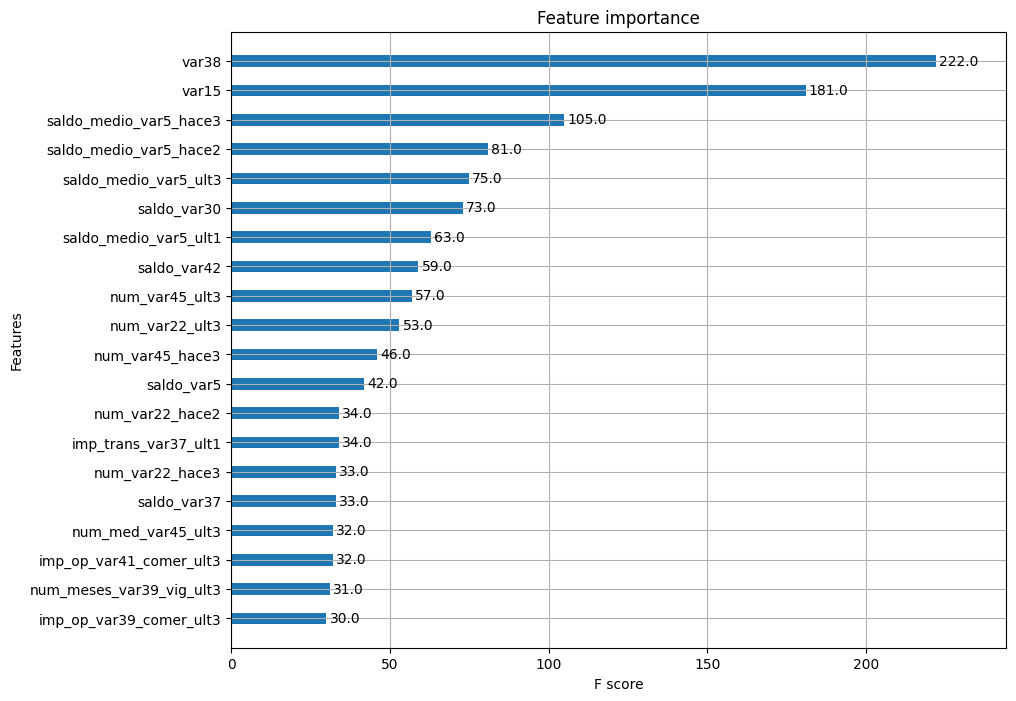

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

XGBosot의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순

## **LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, eval_metirc='auc')
eval_set = [(X_tr, y_tr),(X_val, y_val)]

lgbm_clf.fit(X_tr, y_tr, eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[42]	training's binary_logloss: 0.112183	valid_1's binary_logloss: 0.13527
ROC AUC: 0.8384


LightGBM 수행 결과 ROC AUC가 약 0.8384

XGBoost보다 학습에 걸리는 시간이 좀 더 단축되었음

**HyperOpt를 이용한 하이퍼 파라미터 튜닝**

In [ ]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32,64,1),
                     'max_depth':hp.quniform('max_depth',100,160,1),
                     'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                     'subsample':hp.uniform('subsample',0.7,1),
                     'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

**목적 함수 생성**

In [ ]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimorts=100, early_stopping_rounds=30, eval_metric='auc',
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_samples=int(search_space['min_child_samples']),
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate'])

    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold 방식 적용
    kf = KFold(n_splits=3)

    # X_train을 다시 학습/검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # LightGBMClassifier 학습
        lgbm_clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출 후 roc auc 계산, list에 값 append
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:,1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc 값의 평균값에 (-1)을 곱해 반환
    # fmin()은 목적함수의 '최솟값'을 위한 입력값을 찾으므로

    return (-1)*np.mean(roc_auc_list)

In [104]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

'''
#overload로 실행이 중지됨

best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)
'''

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: '[20278, 20279, 20280, 20285, 20297, 20300, 20303, 20305, 20306, 20311, 20325, 20329, 20330, 20333, 20344, 20345, 20349, 20354, 20362, 20366, 20384, 20388, 20392, 20394, 20403, 20404, 20413, 20418, 20425, 20429, 20447, 20457, 20458, 20461, 20465, 20474, 20493, 20499, 20506, 20508, 20513, 20515, 20521, 20526, 20531, 20532, 20535, 20536, 20550, 20554, 20558, 20559, 20561, 20566, 20575, 20576, 20577, 20579, 20580, 20585, 20587, 20591, 20597, 20598, 20603, 20606, 20622, 20628, 20637, 20641, 20644, 20650, 20653, 20657, 20658, 20663, 20668, 20670, 20674, 20688, 20689, 20692, 20698, 20701, 20714, 20720, 20721, 20728, 20730, 20731, 20738, 20745, 20749, 20750, 20751, 20759, 20762, 20768, 20770, 20777, 20779, 20786, 20789, 20792, 20797, 20798, 20805, 20815, 20816, 20819, 20822, 20823, 20830, 20837, 20844, 20857, 20862, 20878, 20884, 20885, 20889, 20894, 20900, 20920, 20921, 20936, 20948, 20958, 20968, 20973, 20979, 20985, 20992, 20998, 21009, 21013, 21015, 2102

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


KeyError: '[20278, 20279, 20280, 20285, 20297, 20300, 20303, 20305, 20306, 20311, 20325, 20329, 20330, 20333, 20344, 20345, 20349, 20354, 20362, 20366, 20384, 20388, 20392, 20394, 20403, 20404, 20413, 20418, 20425, 20429, 20447, 20457, 20458, 20461, 20465, 20474, 20493, 20499, 20506, 20508, 20513, 20515, 20521, 20526, 20531, 20532, 20535, 20536, 20550, 20554, 20558, 20559, 20561, 20566, 20575, 20576, 20577, 20579, 20580, 20585, 20587, 20591, 20597, 20598, 20603, 20606, 20622, 20628, 20637, 20641, 20644, 20650, 20653, 20657, 20658, 20663, 20668, 20670, 20674, 20688, 20689, 20692, 20698, 20701, 20714, 20720, 20721, 20728, 20730, 20731, 20738, 20745, 20749, 20750, 20751, 20759, 20762, 20768, 20770, 20777, 20779, 20786, 20789, 20792, 20797, 20798, 20805, 20815, 20816, 20819, 20822, 20823, 20830, 20837, 20844, 20857, 20862, 20878, 20884, 20885, 20889, 20894, 20900, 20920, 20921, 20936, 20948, 20958, 20968, 20973, 20979, 20985, 20992, 20998, 21009, 21013, 21015, 21021, 21023, 21028, 21031, 21045, 21047, 21052, 21055, 21056, 21058, 21063, 21064, 21066, 21081, 21087, 21100, 21102, 21111, 21115, 21127, 21131, 21145, 21156, 21161, 21164, 21170, 21178, 21185, 21186, 21193, 21195, 21203, 21204, 21205, 21206, 21210, 21213, 21217, 21220, 21221, 21226, 21228, 21229, 21231, 21235, 21242, 21250, 21253, 21261, 21269, 21279, 21282, 21296, 21301, 21302, 21303, 21309, 21317, 21321, 21323, 21332, 21335, 21342, 21346, 21348, 21353, 21357, 21358, 21361, 21369, 21375, 21383, 21386, 21391, 21394, 21406, 21407, 21410, 21413, 21422, 21428, 21436, 21438, 21441, 21445, 21459, 21462, 21463, 21469, 21478, 21480, 21487, 21492, 21496, 21499, 21527, 21534, 21535, 21541, 21547, 21553, 21559, 21569, 21571, 21577, 21578, 21579, 21595, 21602, 21604, 21606, 21607, 21608, 21610, 21613, 21623, 21624, 21648, 21652, 21654, 21660, 21667, 21677, 21680, 21681, 21683, 21687, 21688, 21690, 21706, 21711, 21717, 21721, 21727, 21731, 21733, 21737, 21740, 21742, 21753, 21757, 21758, 21765, 21773, 21782, 21784, 21813, 21816, 21823, 21825, 21828, 21829, 21837, 21842, 21847, 21855, 21866, 21869, 21873, 21876, 21878, 21890, 21893, 21894, 21896, 21898, 21929, 21935, 21937, 21945, 21980, 21986, 21995, 21997, 22005, 22009, 22019, 22020, 22021, 22023, 22028, 22039, 22045, 22054, 22056, 22072, 22094, 22102, 22109, 22117, 22123, 22125, 22126, 22129, 22131, 22132, 22134, 22153, 22156, 22160, 22161, 22173, 22183, 22185, 22194, 22198, 22200, 22202, 22215, 22220, 22234, 22239, 22252, 22256, 22259, 22261, 22268, 22269, 22277, 22286, 22294, 22307, 22310, 22324, 22325, 22327, 22331, 22337, 22341, 22342, 22346, 22347, 22348, 22350, 22356, 22360, 22365, 22366, 22371, 22387, 22388, 22390, 22391, 22395, 22396, 22403, 22404, 22406, 22409, 22410, 22414, 22415, 22417, 22423, 22424, 22435, 22436, 22445, 22471, 22477, 22480, 22481, 22486, 22487, 22491, 22499, 22500, 22501, 22508, 22513, 22514, 22515, 22519, 22520, 22524, 22525, 22526, 22530, 22534, 22539, 22545, 22550, 22552, 22554, 22555, 22564, 22568, 22570, 22576, 22584, 22586, 22591, 22592, 22600, 22601, 22609, 22624, 22628, 22630, 22632, 22638, 22641, 22653, 22657, 22664, 22665, 22667, 22670, 22672, 22673, 22674, 22681, 22685, 22686, 22701, 22707, 22711, 22713, 22715, 22717, 22729, 22731, 22732, 22734, 22737, 22738, 22740, 22741, 22742, 22745, 22750, 22755, 22756, 22762, 22765, 22768, 22771, 22773, 22776, 22779, 22786, 22790, 22801, 22802, 22803, 22808, 22810, 22813, 22817, 22821, 22827, 22829, 22834, 22836, 22837, 22839, 22844, 22845, 22846, 22848, 22866, 22869, 22872, 22875, 22876, 22887, 22889, 22894, 22900, 22908, 22909, 22911, 22915, 22928, 22932, 22942, 22952, 22959, 22961, 22962, 22966, 22968, 22976, 22990, 23004, 23015, 23016, 23022, 23024, 23028, 23030, 23031, 23033, 23039, 23043, 23055, 23063, 23069, 23076, 23079, 23083, 23085, 23092, 23096, 23098, 23099, 23101, 23113, 23124, 23137, 23140, 23142, 23149, 23155, 23159, 23168, 23183, 23184, 23189, 23195, 23196, 23197, 23199, 23210, 23211, 23212, 23213, 23219, 23221, 23223, 23226, 23227, 23234, 23246, 23249, 23251, 23252, 23261, 23268, 23271, 23279, 23284, 23285, 23291, 23293, 23294, 23297, 23300, 23301, 23317, 23323, 23326, 23328, 23336, 23343, 23347, 23348, 23355, 23357, 23364, 23365, 23368, 23370, 23382, 23383, 23384, 23387, 23389, 23393, 23397, 23399, 23405, 23408, 23414, 23416, 23422, 23434, 23437, 23449, 23458, 23463, 23464, 23465, 23467, 23468, 23485, 23486, 23488, 23491, 23500, 23507, 23518, 23521, 23526, 23532, 23543, 23546, 23548, 23554, 23556, 23565, 23567, 23568, 23574, 23581, 23586, 23593, 23595, 23602, 23604, 23607, 23618, 23622, 23625, 23630, 23635, 23639, 23649, 23652, 23655, 23671, 23676, 23680, 23681, 23683, 23695, 23698, 23699, 23705, 23711, 23725, 23729, 23737, 23746, 23760, 23767, 23778, 23779, 23789, 23797, 23811, 23817, 23818, 23819, 23820, 23822, 23828, 23829, 23830, 23846, 23855, 23858, 23859, 23861, 23864, 23865, 23868, 23870, 23872, 23877, 23878, 23883, 23887, 23895, 23910, 23913, 23915, 23921, 23922, 23929, 23933, 23935, 23938, 23943, 23945, 23949, 23951, 23956, 23971, 23977, 23979, 23989, 24000, 24001, 24006, 24012, 24014, 24020, 24034, 24039, 24041, 24042, 24044, 24050, 24051, 24052, 24053, 24054, 24056, 24058, 24069, 24076, 24080, 24082, 24088, 24094, 24107, 24111, 24116, 24121, 24125, 24128, 24133, 24134, 24145, 24148, 24152, 24158, 24159, 24161, 24169, 24175, 24190, 24194, 24195, 24204, 24205, 24212, 24214, 24220, 24221, 24222, 24224, 24232, 24233, 24236, 24239, 24253, 24264, 24274, 24278, 24279, 24280, 24284, 24286, 24288, 24297, 24315, 24321, 24324, 24326, 24329, 24330, 24345, 24353, 24358, 24369, 24374, 24380, 24381, 24383, 24385, 24412, 24414, 24418, 24420, 24426, 24428, 24430, 24440, 24446, 24448, 24450, 24457, 24472, 24476, 24478, 24482, 24484, 24488, 24491, 24496, 24499, 24506, 24511, 24534, 24535, 24537, 24541, 24544, 24557, 24559, 24561, 24577, 24578, 24587, 24600, 24602, 24617, 24626, 24628, 24632, 24633, 24648, 24650, 24655, 24656, 24662, 24665, 24669, 24670, 24673, 24678, 24679, 24689, 24695, 24699, 24702, 24703, 24705, 24714, 24717, 24722, 24723, 24724, 24727, 24728, 24743, 24748, 24752, 24761, 24763, 24767, 24768, 24769, 24773, 24775, 24786, 24790, 24796, 24809, 24811, 24819, 24825, 24829, 24835, 24836, 24839, 24841, 24845, 24846, 24847, 24848, 24855, 24858, 24863, 24865, 24867, 24869, 24879, 24893, 24894, 24901, 24902, 24910, 24917, 24929, 24930, 24932, 24934, 24938, 24940, 24941, 24951, 24952, 24954, 24960, 24968, 24989, 24995, 24998, 25001, 25002, 25006, 25007, 25016, 25019, 25023, 25027, 25029, 25034, 25048, 25052, 25054, 25057, 25063, 25064, 25071, 25073, 25074, 25079, 25080, 25081, 25085, 25098, 25104, 25113, 25116, 25120, 25126, 25130, 25134, 25140, 25141, 25144, 25157, 25158, 25159, 25161, 25164, 25176, 25180, 25181, 25182, 25193, 25195, 25200, 25205, 25207, 25211, 25216, 25218, 25220, 25232, 25234, 25237, 25241, 25243, 25252, 25263, 25264, 25265, 25270, 25273, 25275, 25277, 25284, 25286, 25289, 25293, 25313, 25315, 25325, 25326, 25334, 25335, 25339, 25369, 25372, 25380, 25399, 25403, 25404, 25406, 25410, 25422, 25436, 25440, 25441, 25446, 25447, 25453, 25457, 25459, 25463, 25464, 25470, 25473, 25478, 25479, 25482, 25485, 25491, 25496, 25498, 25514, 25517, 25518, 25519, 25522, 25524, 25528, 25529, 25531, 25533, 25538, 25547, 25550, 25553, 25564, 25568, 25574, 25575, 25578, 25582, 25585, 25596, 25598, 25601, 25603, 25604, 25608, 25613, 25617, 25619, 25628, 25633, 25662, 25663, 25669, 25672, 25701, 25702, 25704, 25706, 25710, 25712, 25716, 25721, 25722, 25738, 25747, 25752, 25753, 25765, 25770, 25774, 25777, 25797, 25800, 25808, 25811, 25821, 25829, 25831, 25855, 25863, 25866, 25870, 25871, 25885, 25886, 25890, 25891, 25903, 25906, 25913, 25915, 25920, 25929, 25935, 25936, 25942, 25944, 25947, 25951, 25959, 25966, 25969, 25973, 25975, 25980, 25987, 25991, 25993, 25996, 25998, 26008, 26010, 26012, 26017, 26022, 26030, 26039, 26041, 26049, 26050, 26051, 26053, 26056, 26065, 26067, 26091, 26099, 26101, 26106, 26110, 26117, 26134, 26136, 26141, 26155, 26161, 26162, 26165, 26166, 26172, 26173, 26175, 26180, 26184, 26186, 26189, 26195, 26198, 26202, 26204, 26217, 26232, 26234, 26235, 26246, 26250, 26254, 26255, 26257, 26263, 26267, 26275, 26279, 26280, 26281, 26284, 26308, 26309, 26310, 26319, 26322, 26325, 26327, 26328, 26329, 26351, 26354, 26355, 26357, 26358, 26359, 26361, 26365, 26367, 26368, 26383, 26384, 26396, 26397, 26398, 26402, 26406, 26416, 26428, 26432, 26434, 26439, 26444, 26448, 26451, 26458, 26461, 26464, 26469, 26470, 26473, 26474, 26481, 26493, 26494, 26512, 26515, 26520, 26536, 26538, 26541, 26543, 26549, 26551, 26554, 26564, 26568, 26569, 26573, 26582, 26585, 26588, 26595, 26599, 26612, 26616, 26624, 26629, 26630, 26635, 26640, 26650, 26654, 26656, 26665, 26670, 26673, 26674, 26677, 26689, 26691, 26710, 26713, 26715, 26723, 26724, 26729, 26731, 26736, 26738, 26760, 26762, 26764, 26766, 26775, 26778, 26780, 26781, 26784, 26786, 26787, 26788, 26801, 26810, 26811, 26818, 26820, 26830, 26834, 26840, 26845, 26848, 26849, 26852, 26855, 26862, 26871, 26875, 26883, 26884, 26889, 26893, 26895, 26896, 26901, 26906, 26911, 26912, 26913, 26919, 26923, 26929, 26933, 26934, 26938, 26941, 26942, 26947, 26954, 26964, 26967, 26972, 26978, 26984, 26985, 26986, 26988, 27006, 27009, 27011, 27020, 27022, 27024, 27027, 27041, 27054, 27056, 27058, 27061, 27071, 27072, 27076, 27077, 27079, 27081, 27085, 27101, 27114, 27120, 27123, 27124, 27126, 27130, 27133, 27140, 27142, 27146, 27150, 27158, 27159, 27161, 27162, 27164, 27173, 27183, 27184, 27185, 27187, 27195, 27204, 27214, 27219, 27223, 27229, 27239, 27250, 27253, 27258, 27263, 27264, 27266, 27269, 27273, 27274, 27280, 27283, 27284, 27294, 27296, 27299, 27300, 27306, 27313, 27323, 27335, 27344, 27353, 27355, 27357, 27360, 27363, 27364, 27372, 27373, 27380, 27381, 27387, 27388, 27395, 27407, 27415, 27417, 27420, 27422, 27424, 27434, 27436, 27442, 27445, 27447, 27458, 27460, 27464, 27471, 27472, 27475, 27478, 27496, 27509, 27516, 27519, 27539, 27540, 27558, 27559, 27561, 27565, 27566, 27567, 27569, 27577, 27582, 27583, 27593, 27602, 27603, 27609, 27619, 27623, 27630, 27631, 27633, 27634, 27639, 27642, 27654, 27657, 27666, 27671, 27678, 27679, 27680, 27696, 27701, 27702, 27703, 27705, 27708, 27711, 27712, 27713, 27717, 27718, 27719, 27720, 27722, 27728, 27735, 27736, 27737, 27745, 27746, 27747, 27749, 27750, 27759, 27760, 27764, 27767, 27768, 27780, 27790, 27794, 27808, 27826, 27829, 27839, 27840, 27844, 27845, 27854, 27870, 27883, 27888, 27907, 27909, 27911, 27915, 27919, 27923, 27925, 27934, 27937, 27939, 27940, 27943, 27945, 27946, 27949, 27953, 27956, 27960, 27964, 27975, 27976, 27984, 27986, 27987, 27990, 27995, 27998, 28009, 28012, 28021, 28023, 28024, 28030, 28044, 28047, 28050, 28053, 28055, 28072, 28073, 28074, 28088, 28094, 28095, 28097, 28103, 28110, 28112, 28115, 28123, 28124, 28128, 28130, 28150, 28151, 28152, 28159, 28161, 28168, 28175, 28177, 28178, 28185, 28197, 28198, 28202, 28204, 28205, 28212, 28216, 28219, 28224, 28240, 28253, 28259, 28270, 28272, 28277, 28278, 28283, 28289, 28294, 28298, 28300, 28306, 28308, 28309, 28313, 28315, 28317, 28319, 28326, 28330, 28333, 28335, 28336, 28344, 28349, 28360, 28374, 28380, 28387, 28396, 28400, 28408, 28409, 28412, 28415, 28416, 28417, 28419, 28420, 28423, 28425, 28430, 28431, 28433, 28434, 28435, 28444, 28448, 28452, 28455, 28457, 28465, 28466, 28469, 28472, 28476, 28477, 28480, 28486, 28493, 28514, 28522, 28535, 28539, 28542, 28546, 28547, 28549, 28550, 28551, 28553, 28554, 28556, 28559, 28564, 28573, 28574, 28607, 28618, 28627, 28629, 28639, 28640, 28641, 28644, 28655, 28663, 28675, 28677, 28679, 28686, 28688, 28696, 28699, 28702, 28703, 28704, 28707, 28713, 28720, 28730, 28732, 28745, 28756, 28770, 28771, 28778, 28781, 28790, 28794, 28804, 28820, 28821, 28823, 28826, 28827, 28830, 28839, 28844, 28846, 28848, 28850, 28855, 28858, 28860, 28861, 28867, 28871, 28874, 28880, 28881, 28889, 28890, 28891, 28899, 28901, 28908, 28910, 28916, 28917, 28918, 28926, 28929, 28942, 28943, 28947, 28948, 28951, 28957, 28959, 28971, 28980, 28982, 28985, 28988, 28989, 28990, 28998, 29000, 29003, 29005, 29009, 29013, 29016, 29017, 29023, 29033, 29036, 29038, 29046, 29049, 29052, 29053, 29054, 29058, 29061, 29077, 29081, 29084, 29086, 29091, 29093, 29094, 29109, 29115, 29117, 29120, 29131, 29138, 29155, 29159, 29166, 29173, 29182, 29184, 29188, 29189, 29194, 29198, 29199, 29203, 29210, 29211, 29212, 29215, 29217, 29222, 29224, 29225, 29228, 29237, 29238, 29239, 29240, 29242, 29249, 29254, 29261, 29265, 29269, 29275, 29289, 29294, 29303, 29310, 29312, 29327, 29329, 29331, 29335, 29346, 29348, 29350, 29351, 29355, 29359, 29366, 29369, 29377, 29379, 29380, 29387, 29388, 29389, 29390, 29391, 29392, 29397, 29404, 29407, 29415, 29429, 29430, 29434, 29435, 29438, 29444, 29446, 29457, 29461, 29464, 29466, 29479, 29482, 29491, 29492, 29494, 29500, 29502, 29503, 29505, 29511, 29512, 29516, 29535, 29540, 29542, 29544, 29546, 29548, 29550, 29556, 29562, 29570, 29593, 29603, 29608, 29610, 29613, 29619, 29622, 29630, 29634, 29639, 29641, 29642, 29648, 29661, 29662, 29668, 29669, 29674, 29680, 29698, 29724, 29725, 29732, 29738, 29743, 29745, 29750, 29752, 29754, 29756, 29759, 29766, 29781, 29787, 29788, 29791, 29802, 29806, 29819, 29834, 29847, 29853, 29857, 29860, 29862, 29863, 29867, 29869, 29878, 29881, 29888, 29891, 29894, 29899, 29901, 29903, 29904, 29907, 29908, 29909, 29911, 29914, 29923, 29927, 29936, 29942, 29946, 29953, 29959, 29962, 29967, 29970, 29984, 29985, 29989, 29995, 29996, 30003, 30009, 30012, 30013, 30019, 30024, 30027, 30029, 30033, 30035, 30036, 30042, 30045, 30052, 30060, 30064, 30066, 30070, 30071, 30080, 30082, 30088, 30089, 30095, 30096, 30097, 30098, 30114, 30115, 30122, 30135, 30137, 30138, 30154, 30167, 30169, 30175, 30185, 30195, 30203, 30204, 30212, 30217, 30219, 30224, 30226, 30234, 30237, 30245, 30262, 30264, 30271, 30272, 30276, 30277, 30282, 30283, 30285, 30288, 30290, 30304, 30305, 30310, 30312, 30319, 30321, 30326, 30330, 30331, 30335, 30339, 30343, 30349, 30351, 30361, 30362, 30363, 30364, 30366, 30382, 30390, 30402, 30404, 30411, 30413, 30416, 30423, 30424, 30426, 30436, 30439, 30442, 30449, 30453, 30456, 30461, 30469, 30485, 30490, 30498, 30507, 30510, 30511, 30517, 30523, 30531, 30535, 30537, 30540, 30556, 30558, 30560, 30563, 30579, 30580, 30583, 30586, 30587, 30596, 30599, 30601, 30603, 30606, 30614, 30620, 30626, 30628, 30630, 30633, 30645, 30654, 30656, 30657, 30665, 30674, 30676, 30687, 30691, 30698, 30700, 30706, 30711, 30744, 30748, 30749, 30753, 30755, 30770, 30778, 30783, 30788, 30796, 30802, 30805, 30811, 30816, 30817, 30818, 30823, 30834, 30835, 30841, 30846, 30850, 30856, 30864, 30866, 30867, 30869, 30872, 30878, 30880, 30882, 30895, 30900, 30904, 30910, 30916, 30927, 30928, 30931, 30935, 30938, 30945, 30948, 30952, 30960, 30962, 30964, 30965, 30970, 30971, 30975, 30976, 30981, 30994, 30995, 30997, 31005, 31009, 31013, 31016, 31019, 31020, 31022, 31024, 31033, 31040, 31046, 31047, 31048, 31051, 31053, 31056, 31057, 31059, 31080, 31082, 31091, 31094, 31101, 31105, 31107, 31111, 31120, 31128, 31129, 31136, 31139, 31141, 31142, 31145, 31147, 31151, 31155, 31158, 31166, 31167, 31172, 31183, 31185, 31189, 31195, 31197, 31206, 31208, 31214, 31217, 31225, 31237, 31241, 31245, 31246, 31249, 31251, 31252, 31257, 31259, 31266, 31267, 31275, 31276, 31280, 31282, 31287, 31298, 31300, 31313, 31321, 31325, 31329, 31335, 31337, 31344, 31347, 31350, 31351, 31354, 31361, 31363, 31365, 31366, 31367, 31368, 31370, 31384, 31386, 31389, 31398, 31420, 31433, 31437, 31438, 31444, 31449, 31453, 31458, 31471, 31476, 31492, 31497, 31510, 31511, 31518, 31520, 31528, 31530, 31535, 31541, 31543, 31544, 31547, 31554, 31558, 31560, 31563, 31566, 31570, 31571, 31577, 31579, 31581, 31589, 31596, 31597, 31607, 31626, 31627, 31629, 31638, 31640, 31641, 31643, 31650, 31651, 31654, 31657, 31659, 31663, 31667, 31672, 31673, 31674, 31677, 31678, 31680, 31681, 31684, 31693, 31695, 31697, 31699, 31700, 31702, 31709, 31710, 31719, 31722, 31742, 31747, 31749, 31763, 31765, 31770, 31775, 31776, 31790, 31791, 31803, 31805, 31807, 31814, 31821, 31824, 31825, 31827, 31829, 31830, 31840, 31851, 31854, 31856, 31862, 31866, 31873, 31877, 31878, 31880, 31887, 31888, 31891, 31899, 31911, 31912, 31917, 31930, 31937, 31941, 31942, 31945, 31946, 31955, 31963, 31969, 31970, 31976, 31983, 31987, 31988, 31994, 31997, 31998, 32002, 32012, 32014, 32017, 32020, 32022, 32024, 32026, 32035, 32038, 32044, 32047, 32052, 32058, 32060, 32063, 32066, 32067, 32071, 32076, 32084, 32090, 32091, 32093, 32097, 32105, 32108, 32110, 32117, 32120, 32122, 32134, 32142, 32147, 32150, 32151, 32152, 32157, 32161, 32165, 32169, 32173, 32176, 32183, 32184, 32192, 32193, 32196, 32200, 32209, 32225, 32226, 32229, 32231, 32232, 32237, 32239, 32242, 32247, 32252, 32253, 32257, 32260, 32262, 32264, 32273, 32274, 32283, 32284, 32289, 32291, 32296, 32303, 32304, 32306, 32317, 32319, 32322, 32330, 32333, 32341, 32347, 32350, 32356, 32365, 32368, 32373, 32379, 32383, 32389, 32391, 32392, 32393, 32394, 32401, 32409, 32410, 32414, 32436, 32441, 32447, 32448, 32453, 32458, 32464, 32465, 32469, 32476, 32483, 32484, 32485, 32497, 32506, 32519, 32522, 32523, 32525, 32530, 32536, 32541, 32544, 32545, 32551, 32552, 32557, 32558, 32566, 32571, 32588, 32592, 32594, 32595, 32597, 32602, 32605, 32617, 32618, 32620, 32624, 32627, 32628, 32632, 32637, 32640, 32645, 32648, 32665, 32667, 32669, 32674, 32676, 32686, 32688, 32693, 32694, 32704, 32709, 32719, 32721, 32729, 32730, 32733, 32745, 32762, 32775, 32780, 32781, 32785, 32786, 32793, 32801, 32802, 32804, 32820, 32826, 32832, 32844, 32845, 32849, 32854, 32857, 32860, 32863, 32866, 32870, 32871, 32879, 32883, 32886, 32888, 32890, 32899, 32905, 32906, 32915, 32919, 32924, 32927, 32928, 32936, 32937, 32940, 32941, 32944, 32949, 32956, 32962, 32963, 32964, 32969, 32970, 32973, 32984, 32987, 32988, 32989, 32996, 32999, 33003, 33004, 33006, 33008, 33022, 33032, 33042, 33061, 33062, 33078, 33079, 33080, 33087, 33089, 33093, 33094, 33103, 33110, 33111, 33113, 33116, 33118, 33120, 33121, 33128, 33138, 33140, 33142, 33147, 33153, 33154, 33158, 33159, 33164, 33165, 33166, 33169, 33183, 33192, 33205, 33207, 33209, 33221, 33230, 33259, 33263, 33264, 33275, 33280, 33282, 33286, 33295, 33336, 33338, 33339, 33347, 33348, 33351, 33357, 33365, 33367, 33371, 33376, 33377, 33378, 33384, 33388, 33392, 33406, 33412, 33416, 33426, 33428, 33429, 33439, 33445, 33447, 33451, 33454, 33455, 33465, 33469, 33475, 33485, 33487, 33488, 33490, 33491, 33496, 33503, 33504, 33506, 33507, 33510, 33511, 33512, 33518, 33528, 33541, 33553, 33557, 33563, 33567, 33568, 33574, 33579, 33595, 33600, 33602, 33616, 33620, 33621, 33623, 33633, 33639, 33642, 33643, 33644, 33645, 33651, 33654, 33657, 33659, 33664, 33665, 33669, 33673, 33674, 33682, 33684, 33686, 33689, 33707, 33711, 33724, 33729, 33730, 33731, 33732, 33737, 33739, 33743, 33751, 33756, 33763, 33765, 33770, 33777, 33782, 33788, 33794, 33798, 33799, 33805, 33815, 33816, 33831, 33835, 33839, 33841, 33842, 33846, 33849, 33857, 33860, 33864, 33869, 33872, 33879, 33883, 33887, 33897, 33899, 33900, 33902, 33904, 33918, 33919, 33921, 33933, 33934, 33935, 33938, 33944, 33951, 33956, 33961, 33973, 33974, 33983, 33985, 33988, 33989, 33994, 33997, 34007, 34012, 34013, 34015, 34016, 34019, 34028, 34031, 34036, 34044, 34049, 34072, 34083, 34089, 34092, 34098, 34109, 34111, 34114, 34115, 34120, 34121, 34124, 34130, 34137, 34142, 34147, 34159, 34168, 34184, 34188, 34191, 34196, 34205, 34207, 34208, 34210, 34212, 34214, 34216, 34218, 34222, 34223, 34234, 34235, 34245, 34256, 34262, 34268, 34270, 34282, 34284, 34324, 34327, 34328, 34329, 34332, 34335, 34336, 34343, 34346, 34357, 34358, 34362, 34365, 34370, 34382, 34385, 34394, 34407, 34408, 34430, 34434, 34435, 34439, 34440, 34455, 34467, 34477, 34481, 34486, 34494, 34498, 34502, 34505, 34506, 34510, 34511, 34513, 34522, 34524, 34531, 34533, 34534, 34541, 34550, 34555, 34560, 34562, 34565, 34567, 34575, 34579, 34589, 34597, 34598, 34601, 34602, 34605, 34610, 34617, 34621, 34622, 34632, 34635, 34638, 34646, 34648, 34649, 34651, 34652, 34662, 34670, 34672, 34681, 34687, 34692, 34694, 34710, 34711, 34719, 34722, 34740, 34745, 34751, 34754, 34755, 34762, 34765, 34775, 34783, 34785, 34787, 34793, 34796, 34805, 34811, 34812, 34814, 34818, 34841, 34845, 34847, 34852, 34854, 34860, 34862, 34867, 34871, 34876, 34883, 34886, 34892, 34893, 34919, 34922, 34923, 34927, 34928, 34929, 34931, 34945, 34955, 34962, 34964, 34967, 34974, 34976, 34988, 34989, 34993, 34995, 35002, 35005, 35018, 35024, 35026, 35027, 35029, 35030, 35056, 35058, 35059, 35064, 35068, 35075, 35080, 35082, 35089, 35099, 35105, 35111, 35121, 35127, 35129, 35134, 35137, 35140, 35147, 35155, 35156, 35160, 35163, 35166, 35168, 35170, 35178, 35179, 35190, 35192, 35195, 35196, 35201, 35202, 35204, 35206, 35207, 35209, 35210, 35217, 35231, 35238, 35239, 35245, 35247, 35251, 35259, 35261, 35262, 35267, 35270, 35275, 35276, 35277, 35280, 35285, 35291, 35293, 35301, 35304, 35309, 35317, 35318, 35320, 35321, 35329, 35330, 35333, 35334, 35337, 35338, 35342, 35346, 35360, 35362, 35363, 35366, 35369, 35384, 35386, 35391, 35392, 35406, 35411, 35423, 35424, 35426, 35431, 35439, 35440, 35448, 35451, 35453, 35461, 35462, 35464, 35469, 35472, 35475, 35476, 35484, 35485, 35487, 35488, 35498, 35503, 35506, 35507, 35510, 35515, 35519, 35525, 35532, 35539, 35543, 35544, 35546, 35551, 35566, 35581, 35587, 35592, 35594, 35596, 35612, 35615, 35616, 35619, 35628, 35630, 35647, 35663, 35664, 35665, 35671, 35672, 35676, 35687, 35692, 35699, 35705, 35708, 35711, 35719, 35721, 35726, 35729, 35734, 35735, 35739, 35743, 35744, 35747, 35749, 35755, 35758, 35760, 35767, 35770, 35772, 35782, 35786, 35788, 35789, 35798, 35806, 35807, 35831, 35841, 35846, 35847, 35851, 35854, 35855, 35859, 35865, 35868, 35870, 35875, 35880, 35883, 35884, 35888, 35890, 35898, 35899, 35905, 35908, 35912, 35915, 35919, 35925, 35929, 35932, 35938, 35943, 35951, 35954, 35957, 35958, 35961, 35963, 35973, 35974, 35979, 35988, 35991, 35994, 35995, 35998, 36003, 36004, 36007, 36009, 36015, 36025, 36029, 36033, 36039, 36045, 36047, 36050, 36064, 36065, 36071, 36074, 36077, 36089, 36097, 36100, 36107, 36108, 36111, 36113, 36115, 36118, 36119, 36131, 36133, 36146, 36148, 36150, 36156, 36161, 36163, 36171, 36172, 36175, 36177, 36183, 36184, 36185, 36186, 36189, 36191, 36192, 36194, 36198, 36200, 36206, 36207, 36208, 36226, 36227, 36228, 36234, 36235, 36236, 36238, 36240, 36241, 36242, 36246, 36253, 36261, 36271, 36283, 36284, 36291, 36294, 36303, 36304, 36305, 36308, 36311, 36312, 36325, 36329, 36346, 36350, 36354, 36362, 36365, 36369, 36376, 36386, 36390, 36400, 36402, 36411, 36413, 36423, 36424, 36434, 36436, 36443, 36450, 36456, 36465, 36476, 36492, 36508, 36513, 36522, 36531, 36537, 36547, 36550, 36555, 36562, 36569, 36590, 36595, 36597, 36601, 36608, 36609, 36610, 36617, 36632, 36635, 36638, 36640, 36641, 36651, 36653, 36656, 36658, 36665, 36667, 36669, 36679, 36681, 36689, 36702, 36705, 36709, 36715, 36717, 36725, 36731, 36732, 36744, 36749, 36752, 36754, 36764, 36766, 36771, 36772, 36782, 36788, 36791, 36795, 36801, 36804, 36807, 36813, 36819, 36826, 36828, 36832, 36836, 36839, 36844, 36845, 36853, 36855, 36857, 36868, 36872, 36873, 36874, 36876, 36877, 36882, 36885, 36895, 36905, 36906, 36907, 36909, 36911, 36920, 36923, 36924, 36926, 36927, 36928, 36944, 36945, 36948, 36951, 36953, 36960, 36966, 36973, 36976, 36977, 36982, 36985, 36991, 36995, 36998, 37001, 37008, 37012, 37013, 37015, 37017, 37021, 37037, 37044, 37049, 37051, 37053, 37061, 37064, 37069, 37074, 37081, 37088, 37089, 37094, 37095, 37103, 37104, 37116, 37118, 37119, 37120, 37130, 37138, 37144, 37146, 37149, 37152, 37153, 37154, 37158, 37164, 37181, 37183, 37185, 37192, 37196, 37201, 37205, 37209, 37213, 37215, 37217, 37235, 37242, 37244, 37247, 37249, 37251, 37253, 37255, 37259, 37267, 37271, 37273, 37275, 37278, 37287, 37288, 37290, 37291, 37296, 37298, 37301, 37309, 37312, 37314, 37317, 37318, 37325, 37331, 37334, 37335, 37338, 37340, 37347, 37349, 37358, 37369, 37381, 37384, 37391, 37396, 37398, 37402, 37405, 37428, 37429, 37432, 37442, 37443, 37448, 37451, 37459, 37462, 37468, 37469, 37474, 37476, 37480, 37483, 37517, 37520, 37529, 37531, 37545, 37568, 37571, 37577, 37582, 37600, 37602, 37605, 37607, 37609, 37621, 37623, 37625, 37629, 37632, 37640, 37647, 37658, 37661, 37664, 37665, 37676, 37684, 37700, 37705, 37706, 37707, 37712, 37723, 37726, 37731, 37732, 37739, 37744, 37750, 37751, 37759, 37770, 37775, 37780, 37782, 37783, 37784, 37797, 37798, 37805, 37810, 37813, 37815, 37821, 37824, 37827, 37830, 37831, 37833, 37841, 37859, 37861, 37862, 37864, 37869, 37871, 37879, 37887, 37891, 37894, 37897, 37899, 37910, 37919, 37922, 37930, 37932, 37948, 37961, 37963, 37967, 37971, 37972, 37973, 37976, 37985, 37988, 37993, 37995, 38004, 38010, 38017, 38020, 38031, 38033, 38044, 38065, 38071, 38075, 38082, 38091, 38098, 38104, 38105, 38116, 38123, 38128, 38137, 38142, 38147, 38150, 38157, 38160, 38171, 38178, 38189, 38191, 38196, 38198, 38204, 38206, 38232, 38246, 38249, 38259, 38261, 38265, 38266, 38268, 38270, 38271, 38274, 38278, 38287, 38292, 38297, 38302, 38311, 38319, 38323, 38325, 38328, 38333, 38340, 38343, 38348, 38351, 38355, 38357, 38358, 38361, 38378, 38387, 38399, 38408, 38412, 38415, 38419, 38431, 38440, 38442, 38447, 38461, 38467, 38469, 38473, 38474, 38478, 38488, 38489, 38495, 38497, 38500, 38504, 38509, 38513, 38516, 38520, 38549, 38553, 38554, 38557, 38563, 38567, 38571, 38576, 38577, 38578, 38580, 38584, 38586, 38588, 38589, 38595, 38602, 38603, 38608, 38609, 38613, 38616, 38624, 38625, 38629, 38638, 38646, 38657, 38658, 38667, 38671, 38674, 38684, 38700, 38701, 38705, 38711, 38721, 38725, 38727, 38729, 38733, 38734, 38744, 38752, 38757, 38759, 38779, 38788, 38791, 38793, 38803, 38806, 38810, 38814, 38823, 38824, 38837, 38844, 38856, 38862, 38869, 38875, 38879, 38882, 38885, 38887, 38894, 38899, 38906, 38916, 38923, 38927, 38928, 38929, 38932, 38943, 38945, 38953, 38954, 38957, 38968, 38971, 38979, 38988, 38989, 38999, 39003, 39005, 39006, 39011, 39016, 39018, 39023, 39025, 39030, 39043, 39044, 39047, 39048, 39053, 39054, 39057, 39062, 39064, 39065, 39069, 39071, 39083, 39087, 39098, 39113, 39118, 39133, 39136, 39139, 39141, 39144, 39146, 39150, 39152, 39166, 39177, 39187, 39189, 39192, 39210, 39212, 39215, 39216, 39220, 39240, 39243, 39245, 39258, 39260, 39264, 39266, 39267, 39269, 39271, 39272, 39276, 39279, 39284, 39285, 39293, 39295, 39297, 39299, 39310, 39311, 39320, 39324, 39325, 39337, 39339, 39346, 39350, 39356, 39362, 39363, 39367, 39370, 39374, 39378, 39382, 39384, 39387, 39393, 39394, 39397, 39400, 39404, 39407, 39415, 39417, 39423, 39424, 39429, 39430, 39432, 39438, 39440, 39441, 39446, 39451, 39455, 39461, 39462, 39472, 39473, 39474, 39475, 39479, 39484, 39485, 39486, 39493, 39495, 39497, 39500, 39509, 39513, 39516, 39520, 39523, 39526, 39531, 39539, 39541, 39549, 39551, 39552, 39561, 39563, 39569, 39586, 39591, 39595, 39597, 39604, 39605, 39612, 39614, 39615, 39616, 39618, 39622, 39623, 39628, 39636, 39642, 39654, 39655, 39657, 39664, 39665, 39667, 39676, 39684, 39691, 39696, 39699, 39702, 39715, 39716, 39718, 39725, 39732, 39736, 39737, 39743, 39746, 39751, 39772, 39774, 39788, 39794, 39795, 39799, 39801, 39810, 39811, 39812, 39823, 39828, 39836, 39839, 39840, 39845, 39847, 39849, 39851, 39858, 39859, 39864, 39866, 39869, 39871, 39875, 39877, 39879, 39889, 39890, 39907, 39911, 39912, 39917, 39921, 39922, 39927, 39928, 39931, 39940, 39945, 39952, 39966, 39968, 39977, 39978, 39981, 39986, 39990, 39991, 39992, 39997, 39998, 40006, 40007, 40015, 40019, 40030, 40032, 40033, 40035, 40036, 40037, 40039, 40050, 40051, 40053, 40056, 40064, 40065, 40070, 40071, 40076, 40079, 40082, 40085, 40098, 40103, 40109, 40110, 40115, 40128, 40136, 40147, 40151, 40152, 40153, 40162, 40164, 40169, 40174, 40177, 40179, 40181, 40182, 40185, 40188, 40195, 40202, 40203, 40210, 40211, 40212, 40217, 40222, 40223, 40224, 40229, 40232, 40233, 40239, 40242, 40244, 40252, 40254, 40269, 40271, 40272, 40273, 40274, 40286, 40287, 40292, 40293, 40305, 40310, 40315, 40316, 40324, 40337, 40338, 40344, 40347, 40353, 40356, 40362, 40365, 40371, 40376, 40381, 40382, 40393, 40402, 40403, 40415, 40422, 40440, 40449, 40451, 40455, 40458, 40463, 40466, 40467, 40476, 40484, 40486, 40490, 40491, 40511, 40516, 40518, 40523, 40526, 40530, 40532, 40536, 40549, 40564, 40566, 40581, 40585, 40587, 40588, 40590, 40602, 40609, 40612, 40616, 40617, 40619, 40620, 40636, 40637, 40640, 40645, 40649, 40656, 40663, 40664, 40667, 40676, 40679, 40680, 40681, 40683, 40685, 40686, 40711, 40722, 40725, 40728, 40729, 40731, 40733, 40734, 40739, 40742, 40745, 40750, 40755, 40756, 40767, 40768, 40769, 40770, 40776, 40777, 40779, 40780, 40790, 40791, 40793, 40794, 40802, 40804, 40810, 40815, 40819, 40820, 40829, 40844, 40848, 40850, 40863, 40864, 40865, 40868, 40869, 40876, 40878, 40883, 40887, 40891, 40892, 40900, 40911, 40915, 40922, 40940, 40948, 40949, 40957, 40965, 40972, 40978, 40980, 40984, 40985, 40989, 40990, 40993, 40996, 40997, 41001, 41010, 41018, 41027, 41042, 41051, 41052, 41053, 41056, 41061, 41067, 41070, 41072, 41073, 41075, 41078, 41083, 41095, 41096, 41099, 41107, 41114, 41126, 41139, 41143, 41146, 41149, 41150, 41151, 41152, 41154, 41160, 41164, 41165, 41169, 41176, 41179, 41185, 41188, 41191, 41193, 41197, 41207, 41213, 41215, 41231, 41232, 41238, 41241, 41244, 41248, 41249, 41252, 41253, 41262, 41268, 41271, 41277, 41280, 41282, 41284, 41295, 41299, 41308, 41319, 41320, 41326, 41328, 41356, 41362, 41366, 41370, 41378, 41408, 41410, 41418, 41428, 41438, 41439, 41447, 41450, 41451, 41456, 41463, 41471, 41477, 41479, 41485, 41487, 41491, 41492, 41494, 41505, 41516, 41521, 41523, 41524, 41532, 41538, 41550, 41551, 41555, 41560, 41566, 41577, 41580, 41581, 41582, 41591, 41598, 41602, 41603, 41607, 41608, 41620, 41625, 41633, 41635, 41636, 41638, 41654, 41656, 41658, 41663, 41664, 41669, 41670, 41671, 41674, 41678, 41679, 41687, 41699, 41701, 41714, 41717, 41718, 41731, 41734, 41735, 41742, 41748, 41760, 41776, 41779, 41786, 41793, 41801, 41803, 41810, 41811, 41820, 41822, 41830, 41832, 41834, 41848, 41850, 41858, 41872, 41875, 41883, 41884, 41889, 41890, 41896, 41906, 41910, 41914, 41916, 41920, 41926, 41930, 41940, 41942, 41946, 41950, 41952, 41956, 41958, 41972, 41978, 41980, 41983, 41991, 41992, 41998, 42001, 42006, 42010, 42015, 42017, 42020, 42026, 42027, 42028, 42029, 42031, 42035, 42038, 42042, 42044, 42051, 42052, 42056, 42068, 42079, 42082, 42090, 42094, 42099, 42104, 42116, 42120, 42124, 42130, 42134, 42136, 42149, 42150, 42155, 42156, 42159, 42162, 42163, 42169, 42187, 42196, 42197, 42209, 42211, 42212, 42217, 42220, 42229, 42236, 42238, 42241, 42249, 42255, 42256, 42262, 42277, 42297, 42300, 42301, 42312, 42313, 42329, 42343, 42351, 42355, 42358, 42359, 42360, 42361, 42379, 42384, 42385, 42388, 42394, 42397, 42403, 42406, 42408, 42411, 42412, 42414, 42434, 42459, 42460, 42464, 42472, 42473, 42486, 42497, 42499, 42505, 42507, 42510, 42513, 42518, 42523, 42524, 42525, 42527, 42532, 42538, 42541, 42543, 42548, 42551, 42552, 42556, 42564, 42565, 42583, 42592, 42611, 42618, 42634, 42643, 42652, 42656, 42657, 42660, 42669, 42671, 42675, 42682, 42686, 42695, 42701, 42702, 42704, 42707, 42713, 42714, 42718, 42719, 42722, 42726, 42730, 42732, 42735, 42738, 42739, 42740, 42743, 42767, 42773, 42775, 42778, 42780, 42781, 42783, 42790, 42791, 42793, 42802, 42805, 42806, 42812, 42816, 42821, 42822, 42834, 42843, 42846, 42856, 42860, 42865, 42867, 42870, 42875, 42876, 42883, 42884, 42887, 42893, 42897, 42900, 42902, 42904, 42910, 42911, 42912, 42913, 42921, 42926, 42928, 42929, 42934, 42935, 42940, 42944, 42951, 42961, 42963, 42972, 42974, 42975, 42976, 42978, 42994, 42996, 42999, 43009, 43018, 43020, 43021, 43025, 43036, 43038, 43044, 43048, 43049, 43056, 43061, 43077, 43083, 43084, 43085, 43089, 43092, 43094, 43097, 43100, 43107, 43108, 43112, 43114, 43118, 43128, 43132, 43143, 43153, 43157, 43160, 43168, 43179, 43182, 43191, 43192, 43195, 43208, 43220, 43221, 43223, 43227, 43230, 43237, 43243, 43246, 43249, 43269, 43270, 43276, 43279, 43281, 43283, 43285, 43288, 43290, 43307, 43308, 43309, 43310, 43314, 43316, 43319, 43322, 43323, 43325, 43329, 43339, 43340, 43347, 43354, 43360, 43364, 43372, 43375, 43377, 43379, 43383, 43386, 43389, 43391, 43395, 43397, 43398, 43402, 43408, 43409, 43414, 43417, 43418, 43427, 43428, 43432, 43437, 43438, 43442, 43453, 43462, 43469, 43472, 43482, 43487, 43488, 43493, 43496, 43500, 43510, 43524, 43538, 43547, 43559, 43561, 43565, 43568, 43570, 43583, 43589, 43591, 43602, 43604, 43609, 43619, 43620, 43626, 43632, 43645, 43646, 43653, 43683, 43700, 43703, 43711, 43721, 43724, 43744, 43766, 43776, 43781, 43789, 43790, 43792, 43803, 43814, 43820, 43821, 43825, 43828, 43831, 43837, 43856, 43858, 43861, 43866, 43875, 43878, 43887, 43891, 43896, 43897, 43910, 43912, 43914, 43919, 43920, 43921, 43922, 43930, 43934, 43951, 43952, 43954, 43955, 43957, 43964, 43967, 43970, 43976, 43978, 43979, 43981, 43983, 43985, 43988, 43990, 43997, 44000, 44006, 44008, 44014, 44019, 44024, 44027, 44028, 44035, 44045, 44049, 44051, 44064, 44066, 44070, 44083, 44086, 44088, 44089, 44097, 44098, 44108, 44117, 44124, 44126, 44136, 44138, 44145, 44150, 44151, 44152, 44160, 44161, 44171, 44175, 44177, 44179, 44180, 44184, 44187, 44188, 44190, 44194, 44195, 44196, 44222, 44225, 44231, 44232, 44233, 44240, 44242, 44248, 44251, 44252, 44260, 44261, 44278, 44280, 44302, 44303, 44309, 44315, 44316, 44317, 44323, 44334, 44345, 44347, 44348, 44360, 44362, 44366, 44368, 44380, 44382, 44389, 44398, 44401, 44407, 44418, 44419, 44423, 44425, 44426, 44427, 44431, 44434, 44450, 44454, 44456, 44459, 44467, 44471, 44472, 44473, 44477, 44485, 44488, 44490, 44494, 44502, 44505, 44506, 44512, 44519, 44521, 44528, 44535, 44544, 44560, 44570, 44583, 44585, 44589, 44590, 44594, 44595, 44597, 44601, 44602, 44608, 44610, 44614, 44615, 44618, 44619, 44620, 44626, 44627, 44641, 44643, 44650, 44651, 44655, 44656, 44657, 44658, 44666, 44667, 44681, 44688, 44708, 44716, 44717, 44727, 44728, 44729, 44734, 44735, 44737, 44738, 44740, 44756, 44760, 44767, 44769, 44770, 44776, 44777, 44782, 44783, 44787, 44792, 44793, 44800, 44801, 44803, 44808, 44811, 44814, 44821, 44835, 44837, 44846, 44858, 44860, 44862, 44874, 44878, 44885, 44887, 44888, 44896, 44899, 44900, 44904, 44905, 44909, 44913, 44914, 44927, 44934, 44940, 44944, 44951, 44952, 44966, 44967, 44977, 44978, 44980, 44984, 44990, 44996, 44997, 44999, 45003, 45006, 45013, 45021, 45022, 45023, 45024, 45025, 45029, 45042, 45045, 45064, 45077, 45079, 45080, 45085, 45087, 45088, 45094, 45099, 45101, 45104, 45109, 45113, 45115, 45124, 45128, 45135, 45138, 45142, 45145, 45146, 45148, 45158, 45159, 45164, 45168, 45173, 45175, 45177, 45178, 45190, 45195, 45203, 45204, 45215, 45222, 45223, 45232, 45233, 45236, 45243, 45262, 45263, 45267, 45278, 45286, 45294, 45300, 45309, 45312, 45313, 45319, 45321, 45323, 45335, 45351, 45355, 45359, 45363, 45364, 45365, 45369, 45381, 45382, 45388, 45394, 45399, 45405, 45408, 45411, 45417, 45418, 45422, 45423, 45428, 45429, 45436, 45440, 45442, 45447, 45455, 45459, 45461, 45468, 45469, 45470, 45471, 45487, 45489, 45494, 45495, 45499, 45501, 45504, 45507, 45519, 45522, 45527, 45528, 45540, 45547, 45549, 45550, 45556, 45569, 45572, 45581, 45584, 45589, 45590, 45592, 45594, 45595, 45597, 45614, 45617, 45618, 45619, 45625, 45630, 45634, 45638, 45641, 45654, 45659, 45671, 45680, 45686, 45694, 45696, 45697, 45700, 45703, 45710, 45718, 45731, 45735, 45739, 45740, 45750, 45772, 45775, 45778, 45781, 45799, 45804, 45806, 45818, 45819, 45823, 45829, 45833, 45834, 45836, 45837, 45839, 45845, 45847, 45853, 45860, 45867, 45871, 45872, 45873, 45876, 45885, 45886, 45888, 45893, 45895, 45898, 45900, 45903, 45905, 45906, 45908, 45925, 45930, 45933, 45938, 45944, 45946, 45948, 45949, 45952, 45955, 45962, 45963, 45970, 45990, 45991, 45994, 45996, 46004, 46005, 46007, 46009, 46011, 46018, 46021, 46023, 46024, 46028, 46040, 46050, 46051, 46057, 46059, 46061, 46070, 46078, 46080, 46083, 46089, 46099, 46102, 46103, 46105, 46108, 46114, 46118, 46119, 46122, 46128, 46136, 46143, 46147, 46150, 46153, 46160, 46163, 46166, 46168, 46179, 46183, 46188, 46209, 46228, 46244, 46250, 46252, 46254, 46255, 46256, 46276, 46285, 46291, 46293, 46296, 46303, 46304, 46310, 46311, 46312, 46313, 46315, 46318, 46328, 46330, 46334, 46339, 46342, 46344, 46349, 46351, 46352, 46357, 46360, 46370, 46375, 46381, 46397, 46403, 46407, 46414, 46417, 46423, 46443, 46452, 46459, 46460, 46463, 46469, 46482, 46485, 46498, 46513, 46516, 46521, 46527, 46530, 46539, 46540, 46546, 46548, 46565, 46566, 46574, 46584, 46587, 46596, 46598, 46601, 46603, 46622, 46624, 46626, 46640, 46657, 46667, 46672, 46684, 46685, 46687, 46692, 46694, 46697, 46702, 46709, 46732, 46734, 46735, 46737, 46746, 46747, 46753, 46754, 46758, 46766, 46768, 46769, 46771, 46772, 46784, 46795, 46799, 46803, 46805, 46809, 46810, 46812, 46820, 46822, 46829, 46831, 46834, 46837, 46839, 46852, 46860, 46867, 46868, 46881, 46891, 46892, 46894, 46900, 46903, 46907, 46914, 46923, 46926, 46929, 46936, 46939, 46941, 46948, 46961, 46969, 46975, 46976, 46979, 46980, 46988, 46989, 46992, 47001, 47002, 47008, 47029, 47039, 47043, 47045, 47046, 47050, 47051, 47053, 47056, 47060, 47064, 47065, 47074, 47083, 47086, 47089, 47090, 47099, 47100, 47104, 47111, 47120, 47121, 47124, 47127, 47128, 47132, 47136, 47140, 47143, 47144, 47145, 47147, 47160, 47167, 47185, 47194, 47195, 47198, 47199, 47206, 47208, 47209, 47220, 47223, 47233, 47235, 47237, 47238, 47251, 47255, 47272, 47278, 47285, 47287, 47289, 47292, 47295, 47296, 47298, 47301, 47311, 47315, 47318, 47324, 47333, 47337, 47343, 47345, 47348, 47356, 47365, 47369, 47372, 47378, 47383, 47388, 47393, 47396, 47397, 47399, 47404, 47409, 47410, 47411, 47420, 47421, 47425, 47438, 47441, 47443, 47453, 47455, 47458, 47461, 47466, 47469, 47471, 47473, 47476, 47477, 47478, 47482, 47483, 47493, 47494, 47501, 47503, 47513, 47515, 47527, 47532, 47539, 47541, 47542, 47545, 47547, 47561, 47567, 47569, 47580, 47582, 47586, 47590, 47591, 47600, 47601, 47611, 47613, 47630, 47632, 47634, 47652, 47654, 47655, 47656, 47659, 47668, 47669, 47675, 47683, 47686, 47693, 47694, 47700, 47707, 47718, 47724, 47727, 47729, 47731, 47732, 47733, 47737, 47741, 47742, 47744, 47747, 47748, 47750, 47753, 47754, 47755, 47756, 47757, 47761, 47768, 47774, 47775, 47778, 47780, 47789, 47798, 47809, 47827, 47829, 47832, 47834, 47836, 47840, 47841, 47846, 47851, 47853, 47861, 47862, 47864, 47865, 47866, 47875, 47880, 47885, 47889, 47894, 47897, 47899, 47902, 47905, 47918, 47919, 47927, 47930, 47933, 47943, 47949, 47951, 47957, 47960, 47966, 47971, 47974, 47977, 47982, 47989, 47991, 47992, 47997, 48017, 48021, 48023, 48042, 48052, 48062, 48064, 48067, 48073, 48077, 48078, 48079, 48085, 48092, 48094, 48098, 48113, 48116, 48125, 48126, 48129, 48145, 48157, 48162, 48163, 48164, 48165, 48168, 48178, 48179, 48182, 48187, 48190, 48194, 48196, 48197, 48200, 48206, 48209, 48216, 48220, 48224, 48225, 48226, 48227, 48230, 48232, 48237, 48241, 48242, 48246, 48249, 48251, 48258, 48262, 48267, 48268, 48277, 48289, 48293, 48294, 48295, 48298, 48303, 48306, 48308, 48310, 48311, 48333, 48334, 48341, 48353, 48363, 48364, 48365, 48369, 48370, 48374, 48387, 48388, 48396, 48404, 48405, 48407, 48408, 48415, 48417, 48425, 48426, 48427, 48431, 48439, 48442, 48455, 48461, 48462, 48463, 48464, 48466, 48467, 48474, 48476, 48480, 48486, 48488, 48494, 48503, 48509, 48510, 48517, 48520, 48523, 48525, 48528, 48530, 48532, 48541, 48544, 48545, 48551, 48554, 48559, 48561, 48570, 48581, 48582, 48585, 48586, 48588, 48589, 48592, 48593, 48599, 48603, 48619, 48624, 48628, 48629, 48636, 48637, 48638, 48647, 48670, 48676, 48694, 48695, 48699, 48703, 48707, 48708, 48710, 48721, 48731, 48733, 48734, 48736, 48741, 48753, 48758, 48771, 48774, 48775, 48782, 48784, 48787, 48799, 48802, 48806, 48807, 48824, 48829, 48831, 48834, 48839, 48846, 48849, 48850, 48853, 48866, 48868, 48871, 48874, 48876, 48877, 48879, 48883, 48885, 48887, 48891, 48913, 48915, 48918, 48929, 48930, 48935, 48937, 48948, 48962, 48964, 48971, 48972, 48973, 48976, 48980, 48982, 48984, 48987, 48994, 48996, 49006, 49009, 49026, 49032, 49033, 49037, 49040, 49045, 49046, 49047, 49049, 49055, 49057, 49059, 49061, 49065, 49072, 49079, 49082, 49085, 49086, 49090, 49100, 49103, 49108, 49110, 49116, 49119, 49120, 49127, 49130, 49134, 49135, 49136, 49137, 49138, 49150, 49155, 49170, 49171, 49179, 49181, 49182, 49184, 49194, 49195, 49199, 49206, 49207, 49212, 49215, 49221, 49229, 49230, 49232, 49250, 49254, 49257, 49261, 49265, 49270, 49271, 49274, 49275, 49289, 49294, 49300, 49306, 49307, 49310, 49312, 49314, 49316, 49322, 49329, 49336, 49339, 49345, 49347, 49349, 49369, 49370, 49371, 49384, 49395, 49404, 49407, 49408, 49410, 49412, 49419, 49421, 49424, 49431, 49433, 49435, 49438, 49443, 49458, 49460, 49465, 49466, 49468, 49469, 49475, 49477, 49480, 49482, 49486, 49492, 49499, 49500, 49505, 49509, 49514, 49518, 49521, 49528, 49531, 49536, 49539, 49545, 49551, 49554, 49575, 49578, 49584, 49595, 49606, 49608, 49611, 49613, 49614, 49615, 49621, 49622, 49631, 49640, 49646, 49649, 49652, 49654, 49657, 49659, 49665, 49668, 49676, 49680, 49682, 49691, 49692, 49693, 49701, 49702, 49704, 49707, 49708, 49713, 49726, 49732, 49733, 49740, 49752, 49757, 49759, 49764, 49772, 49775, 49776, 49784, 49787, 49788, 49791, 49794, 49799, 49819, 49831, 49832, 49834, 49839, 49847, 49860, 49865, 49869, 49872, 49874, 49876, 49877, 49882, 49886, 49888, 49889, 49893, 49897, 49903, 49907, 49908, 49915, 49916, 49917, 49927, 49938, 49945, 49948, 49977, 49979, 49981, 49982, 49984, 49986, 49987, 49993, 50008, 50017, 50023, 50028, 50034, 50037, 50041, 50050, 50060, 50064, 50075, 50078, 50080, 50081, 50095, 50102, 50110, 50111, 50122, 50126, 50131, 50132, 50134, 50141, 50149, 50154, 50155, 50163, 50165, 50167, 50169, 50178, 50181, 50185, 50192, 50194, 50195, 50199, 50204, 50205, 50210, 50214, 50216, 50223, 50231, 50241, 50243, 50253, 50261, 50268, 50277, 50280, 50300, 50302, 50304, 50307, 50311, 50314, 50318, 50321, 50323, 50326, 50329, 50330, 50331, 50334, 50344, 50349, 50351, 50354, 50356, 50367, 50376, 50380, 50382, 50396, 50406, 50407, 50412, 50416, 50422, 50423, 50427, 50443, 50463, 50464, 50469, 50471, 50472, 50476, 50482, 50486, 50487, 50489, 50496, 50498, 50513, 50515, 50520, 50530, 50534, 50538, 50552, 50556, 50569, 50570, 50580, 50581, 50583, 50584, 50585, 50589, 50595, 50596, 50597, 50598, 50605, 50606, 50608, 50609, 50612, 50619, 50623, 50632, 50654, 50664, 50665, 50670, 50672, 50683, 50685, 50686, 50692, 50696, 50697, 50698, 50699, 50702, 50705, 50710, 50713, 50715, 50719, 50720, 50721, 50730, 50733, 50736, 50739, 50742, 50744, 50754, 50755, 50756, 50776, 50780, 50791, 50793, 50806, 50807, 50816, 50817, 50818, 50821, 50826, 50830, 50837, 50841, 50843, 50845, 50853, 50861, 50864, 50868, 50877, 50888, 50899, 50900, 50901, 50902, 50920, 50926, 50930, 50940, 50942, 50944, 50952, 50953, 50961, 50963, 50964, 50967, 50969, 50971, 50974, 50979, 50981, 50986, 50987, 50990, 50999, 51000, 51006, 51013, 51017, 51036, 51037, 51041, 51046, 51061, 51071, 51072, 51076, 51081, 51087, 51088, 51093, 51094, 51096, 51100, 51108, 51114, 51121, 51125, 51131, 51135, 51147, 51148, 51154, 51160, 51169, 51173, 51175, 51203, 51205, 51226, 51227, 51234, 51250, 51251, 51253, 51256, 51257, 51258, 51262, 51273, 51274, 51283, 51292, 51298, 51300, 51307, 51316, 51321, 51328, 51331, 51347, 51353, 51359, 51368, 51380, 51384, 51391, 51393, 51405, 51406, 51409, 51413, 51415, 51424, 51431, 51437, 51439, 51446, 51447, 51456, 51457, 51458, 51462, 51471, 51477, 51480, 51482, 51484, 51488, 51490, 51495, 51497, 51506, 51513, 51515, 51523, 51526, 51527, 51529, 51535, 51541, 51545, 51546, 51569, 51582, 51588, 51592, 51599, 51604, 51606, 51608, 51611, 51614, 51618, 51622, 51631, 51636, 51637, 51642, 51649, 51651, 51656, 51665, 51675, 51676, 51688, 51691, 51692, 51697, 51703, 51712, 51721, 51733, 51738, 51745, 51750, 51752, 51762, 51766, 51772, 51777, 51778, 51782, 51786, 51798, 51799, 51800, 51804, 51805, 51828, 51829, 51830, 51837, 51846, 51849, 51850, 51855, 51857, 51860, 51862, 51864, 51874, 51885, 51887, 51888, 51891, 51894, 51899, 51908, 51916, 51921, 51928, 51931, 51943, 51953, 51954, 51963, 51972, 51973, 51978, 51979, 51983, 51989, 51994, 52002, 52005, 52012, 52017, 52024, 52040, 52041, 52064, 52068, 52069, 52074, 52082, 52083, 52096, 52100, 52103, 52110, 52114, 52122, 52123, 52125, 52128, 52157, 52159, 52171, 52173, 52190, 52196, 52198, 52200, 52202, 52207, 52221, 52228, 52229, 52231, 52232, 52240, 52241, 52247, 52254, 52258, 52261, 52270, 52272, 52274, 52283, 52299, 52305, 52306, 52309, 52320, 52321, 52327, 52331, 52332, 52333, 52343, 52345, 52353, 52357, 52362, 52366, 52367, 52368, 52372, 52376, 52380, 52385, 52389, 52402, 52406, 52408, 52413, 52417, 52418, 52419, 52421, 52423, 52426, 52440, 52441, 52445, 52448, 52450, 52454, 52457, 52459, 52463, 52465, 52466, 52467, 52472, 52479, 52492, 52495, 52502, 52508, 52512, 52516, 52518, 52521, 52522, 52525, 52527, 52528, 52531, 52536, 52546, 52554, 52557, 52563, 52566, 52569, 52574, 52578, 52583, 52584, 52587, 52591, 52594, 52597, 52601, 52612, 52615, 52625, 52626, 52628, 52632, 52635, 52639, 52641, 52644, 52654, 52662, 52674, 52679, 52683, 52685, 52687, 52694, 52697, 52703, 52711, 52713, 52717, 52718, 52727, 52734, 52739, 52740, 52747, 52750, 52751, 52752, 52753, 52759, 52763, 52767, 52775, 52779, 52782, 52784, 52785, 52786, 52790, 52795, 52796, 52799, 52805, 52813, 52818, 52821, 52822, 52830, 52831, 52837, 52839, 52845, 52851, 52852, 52855, 52861, 52876, 52882, 52883, 52896, 52898, 52899, 52901, 52902, 52904, 52908, 52912, 52918, 52928, 52947, 52955, 52964, 52967, 52969, 52970, 52976, 52981, 52987, 52994, 52997, 53002, 53008, 53010, 53030, 53034, 53046, 53047, 53054, 53055, 53069, 53071, 53073, 53083, 53088, 53097, 53098, 53101, 53108, 53124, 53125, 53126, 53127, 53131, 53134, 53141, 53143, 53152, 53153, 53154, 53157, 53172, 53175, 53181, 53185, 53186, 53188, 53193, 53194, 53199, 53208, 53211, 53213, 53217, 53226, 53229, 53232, 53233, 53234, 53239, 53241, 53244, 53257, 53261, 53264, 53266, 53267, 53270, 53273, 53276, 53277, 53282, 53290, 53297, 53298, 53301, 53305, 53307, 53308, 53311, 53316, 53318, 53320, 53323, 53325, 53332, 53343, 53344, 53345, 53352, 53357, 53360, 53362, 53371, 53382, 53386, 53391, 53406, 53413, 53419, 53426, 53439, 53445, 53446, 53449, 53451, 53452, 53457, 53458, 53460, 53464, 53472, 53489, 53491, 53492, 53493, 53494, 53497, 53499, 53504, 53529, 53530, 53532, 53549, 53551, 53569, 53576, 53578, 53586, 53592, 53595, 53598, 53606, 53616, 53623, 53626, 53627, 53632, 53635, 53641, 53650, 53651, 53663, 53665, 53676, 53680, 53681, 53684, 53686, 53691, 53693, 53698, 53702, 53703, 53708, 53716, 53718, 53723, 53728, 53732, 53734, 53736, 53745, 53746, 53748, 53750, 53756, 53761, 53767, 53770, 53774, 53780, 53782, 53801, 53804, 53807, 53808, 53811, 53826, 53830, 53832, 53835, 53840, 53842, 53843, 53845, 53847, 53855, 53857, 53858, 53863, 53866, 53877, 53884, 53885, 53890, 53896, 53899, 53901, 53902, 53907, 53909, 53912, 53917, 53922, 53927, 53932, 53934, 53936, 53937, 53944, 53948, 53964, 53975, 53978, 53993, 53997, 54002, 54005, 54009, 54010, 54012, 54021, 54022, 54026, 54032, 54034, 54040, 54044, 54046, 54051, 54057, 54063, 54069, 54076, 54080, 54085, 54086, 54087, 54089, 54091, 54101, 54103, 54114, 54115, 54116, 54117, 54123, 54124, 54130, 54135, 54136, 54139, 54142, 54143, 54155, 54157, 54159, 54172, 54187, 54195, 54197, 54215, 54216, 54220, 54227, 54230, 54234, 54241, 54245, 54247, 54262, 54270, 54272, 54276, 54279, 54284, 54291, 54293, 54304, 54312, 54315, 54320, 54327, 54330, 54332, 54333, 54335, 54339, 54341, 54346, 54350, 54352, 54356, 54357, 54360, 54361, 54362, 54371, 54372, 54373, 54379, 54384, 54391, 54392, 54406, 54409, 54414, 54420, 54431, 54437, 54443, 54446, 54452, 54457, 54467, 54471, 54472, 54480, 54482, 54483, 54484, 54492, 54494, 54508, 54527, 54531, 54532, 54535, 54547, 54558, 54566, 54571, 54572, 54579, 54581, 54591, 54595, 54597, 54603, 54604, 54608, 54612, 54623, 54624, 54626, 54628, 54629, 54638, 54644, 54654, 54657, 54659, 54679, 54682, 54684, 54691, 54695, 54701, 54704, 54707, 54719, 54720, 54726, 54727, 54728, 54733, 54735, 54738, 54740, 54741, 54743, 54749, 54760, 54761, 54766, 54773, 54774, 54776, 54777, 54782, 54783, 54786, 54788, 54792, 54797, 54800, 54811, 54815, 54818, 54822, 54823, 54826, 54827, 54829, 54830, 54834, 54837, 54841, 54853, 54855, 54866, 54870, 54874, 54880, 54884, 54887, 54893, 54903, 54910, 54913, 54918, 54919, 54934, 54937, 54938, 54941, 54947, 54949, 54951, 54952, 54956, 54957, 54970, 54984, 54985, 54991, 54997, 55005, 55007, 55009, 55010, 55012, 55015, 55018, 55019, 55020, 55028, 55035, 55036, 55040, 55042, 55046, 55051, 55057, 55064, 55069, 55071, 55073, 55076, 55080, 55084, 55085, 55104, 55105, 55115, 55123, 55126, 55127, 55129, 55134, 55142, 55143, 55145, 55146, 55149, 55150, 55152, 55159, 55164, 55169, 55176, 55182, 55183, 55184, 55185, 55194, 55198, 55200, 55216, 55222, 55225, 55229, 55236, 55237, 55252, 55259, 55260, 55262, 55263, 55286, 55297, 55298, 55306, 55307, 55308, 55312, 55313, 55317, 55322, 55324, 55334, 55337, 55338, 55340, 55348, 55349, 55361, 55362, 55368, 55377, 55379, 55386, 55392, 55396, 55403, 55409, 55411, 55416, 55424, 55427, 55431, 55440, 55447, 55452, 55459, 55482, 55495, 55500, 55503, 55508, 55514, 55524, 55530, 55534, 55540, 55542, 55544, 55545, 55549, 55561, 55570, 55574, 55576, 55582, 55583, 55597, 55600, 55603, 55609, 55611, 55613, 55616, 55619, 55624, 55626, 55648, 55653, 55656, 55660, 55665, 55668, 55672, 55681, 55688, 55692, 55708, 55711, 55712, 55720, 55728, 55738, 55739, 55744, 55760, 55761, 55764, 55765, 55779, 55784, 55786, 55797, 55804, 55813, 55815, 55816, 55818, 55825, 55834, 55835, 55846, 55850, 55855, 55858, 55864, 55876, 55889, 55890, 55893, 55894, 55896, 55902, 55909, 55912, 55924, 55930, 55933, 55937, 55942, 55950, 55952, 55960, 55963, 55966, 55971, 55972, 55973, 55974, 55978, 55987, 55995, 55999, 56007, 56009, 56012, 56022, 56025, 56027, 56032, 56036, 56044, 56047, 56050, 56053, 56054, 56065, 56068, 56079, 56082, 56087, 56091, 56096, 56097, 56102, 56103, 56112, 56113, 56117, 56119, 56120, 56125, 56138, 56144, 56149, 56162, 56165, 56169, 56172, 56180, 56191, 56193, 56200, 56201, 56208, 56210, 56212, 56216, 56217, 56219, 56223, 56240, 56252, 56256, 56269, 56272, 56273, 56275, 56278, 56284, 56287, 56293, 56295, 56298, 56301, 56307, 56327, 56331, 56343, 56347, 56351, 56357, 56364, 56366, 56367, 56375, 56377, 56386, 56394, 56395, 56404, 56410, 56419, 56429, 56430, 56440, 56442, 56452, 56454, 56457, 56479, 56488, 56498, 56504, 56507, 56510, 56514, 56515, 56520, 56524, 56527, 56532, 56547, 56554, 56565, 56575, 56578, 56582, 56587, 56588, 56590, 56594, 56600, 56607, 56609, 56615, 56618, 56621, 56625, 56627, 56629, 56633, 56634, 56644, 56650, 56651, 56653, 56655, 56663, 56666, 56677, 56678, 56679, 56684, 56688, 56692, 56698, 56699, 56702, 56706, 56714, 56716, 56717, 56718, 56720, 56734, 56736, 56737, 56743, 56744, 56745, 56747, 56750, 56751, 56753, 56754, 56756, 56758, 56766, 56773, 56777, 56784, 56788, 56790, 56793, 56795, 56800, 56806, 56815, 56816, 56820, 56825, 56826, 56829, 56834, 56839, 56844, 56845, 56849, 56850, 56851, 56857, 56863, 56870, 56871, 56873, 56876, 56887, 56891, 56892, 56893, 56902, 56903, 56908, 56915, 56916, 56920, 56926, 56928, 56931, 56932, 56943, 56944, 56946, 56949, 56952, 56959, 56963, 56964, 56975, 56978, 56980, 56982, 56986, 56988, 56989, 56994, 56998, 57000, 57002, 57006, 57010, 57014, 57016, 57017, 57025, 57027, 57040, 57042, 57048, 57053, 57057, 57062, 57070, 57073, 57083, 57084, 57089, 57101, 57104, 57105, 57107, 57123, 57129, 57137, 57149, 57150, 57152, 57154, 57156, 57163, 57169, 57170, 57173, 57178, 57180, 57182, 57194, 57198, 57200, 57205, 57208, 57209, 57212, 57216, 57219, 57228, 57237, 57245, 57258, 57259, 57262, 57263, 57267, 57268, 57270, 57273, 57274, 57275, 57276, 57282, 57285, 57286, 57287, 57289, 57292, 57298, 57300, 57302, 57307, 57309, 57314, 57315, 57316, 57323, 57330, 57331, 57339, 57344, 57345, 57350, 57355, 57357, 57359, 57363, 57365, 57370, 57371, 57375, 57379, 57382, 57385, 57394, 57397, 57402, 57407, 57409, 57418, 57422, 57434, 57455, 57458, 57461, 57466, 57469, 57474, 57478, 57485, 57489, 57492, 57494, 57498, 57501, 57504, 57535, 57538, 57552, 57553, 57554, 57557, 57559, 57560, 57562, 57563, 57566, 57572, 57580, 57581, 57584, 57589, 57593, 57598, 57617, 57621, 57628, 57630, 57631, 57633, 57635, 57638, 57639, 57640, 57641, 57646, 57649, 57653, 57657, 57658, 57669, 57675, 57676, 57681, 57683, 57690, 57698, 57703, 57706, 57716, 57717, 57718, 57722, 57723, 57725, 57728, 57730, 57732, 57735, 57736, 57737, 57739, 57744, 57752, 57769, 57779, 57780, 57783, 57789, 57803, 57814, 57815, 57817, 57818, 57819, 57821, 57824, 57827, 57828, 57840, 57845, 57855, 57859, 57863, 57865, 57868, 57872, 57880, 57887, 57896, 57897, 57899, 57904, 57912, 57913, 57915, 57916, 57919, 57921, 57925, 57926, 57927, 57929, 57930, 57935, 57939, 57950, 57957, 57962, 57963, 57966, 57969, 57972, 57974, 57975, 57980, 57990, 57994, 57995, 57997, 57998, 58002, 58012, 58013, 58017, 58018, 58019, 58022, 58032, 58034, 58045, 58054, 58060, 58064, 58071, 58077, 58078, 58087, 58088, 58095, 58099, 58102, 58117, 58119, 58120, 58121, 58123, 58130, 58140, 58141, 58150, 58151, 58153, 58155, 58157, 58159, 58163, 58168, 58170, 58176, 58182, 58183, 58188, 58193, 58196, 58197, 58200, 58207, 58209, 58215, 58218, 58223, 58227, 58229, 58238, 58245, 58254, 58260, 58268, 58274, 58275, 58278, 58284, 58287, 58292, 58296, 58299, 58303, 58319, 58325, 58329, 58331, 58333, 58335, 58336, 58343, 58347, 58348, 58349, 58352, 58354, 58367, 58372, 58374, 58376, 58395, 58403, 58406, 58419, 58421, 58426, 58429, 58432, 58435, 58439, 58448, 58465, 58468, 58470, 58471, 58484, 58485, 58486, 58495, 58498, 58500, 58512, 58514, 58517, 58518, 58519, 58526, 58534, 58544, 58549, 58552, 58556, 58559, 58561, 58565, 58567, 58570, 58572, 58590, 58591, 58592, 58596, 58599, 58610, 58614, 58615, 58616, 58623, 58629, 58630, 58636, 58639, 58649, 58656, 58672, 58680, 58684, 58685, 58693, 58697, 58699, 58701, 58707, 58709, 58713, 58720, 58727, 58732, 58744, 58745, 58752, 58756, 58760, 58773, 58776, 58783, 58784, 58786, 58787, 58788, 58792, 58795, 58796, 58799, 58808, 58809, 58815, 58816, 58818, 58822, 58823, 58824, 58826, 58827, 58829, 58834, 58840, 58844, 58846, 58848, 58849, 58851, 58856, 58858, 58859, 58864, 58867, 58885, 58886, 58889, 58902, 58907, 58925, 58933, 58945, 58951, 58954, 58975, 58976, 58979, 59003, 59006, 59007, 59010, 59019, 59020, 59021, 59025, 59030, 59048, 59050, 59053, 59055, 59060, 59062, 59067, 59073, 59075, 59078, 59081, 59089, 59093, 59096, 59100, 59109, 59113, 59115, 59116, 59117, 59124, 59128, 59130, 59133, 59135, 59137, 59146, 59147, 59150, 59154, 59159, 59167, 59174, 59181, 59189, 59200, 59203, 59210, 59212, 59214, 59215, 59216, 59222, 59224, 59244, 59248, 59261, 59263, 59278, 59282, 59286, 59288, 59291, 59305, 59309, 59310, 59326, 59327, 59329, 59332, 59333, 59338, 59342, 59352, 59357, 59362, 59369, 59371, 59380, 59383, 59388, 59392, 59398, 59410, 59417, 59419, 59423, 59430, 59432, 59434, 59438, 59449, 59450, 59451, 59459, 59460, 59465, 59469, 59486, 59487, 59496, 59497, 59499, 59501, 59503, 59505, 59509, 59511, 59515, 59516, 59520, 59522, 59526, 59539, 59540, 59544, 59545, 59546, 59548, 59556, 59560, 59566, 59570, 59582, 59586, 59598, 59603, 59619, 59621, 59624, 59626, 59627, 59635, 59656, 59658, 59668, 59673, 59674, 59677, 59679, 59696, 59698, 59702, 59708, 59709, 59713, 59714, 59725, 59728, 59732, 59733, 59734, 59739, 59741, 59746, 59749, 59750, 59754, 59757, 59761, 59763, 59772, 59778, 59780, 59783, 59790, 59809, 59810, 59821, 59823, 59831, 59838, 59842, 59844, 59857, 59858, 59867, 59868, 59880, 59884, 59888, 59894, 59896, 59897, 59900, 59901, 59904, 59905, 59911, 59916, 59925, 59927, 59928, 59929, 59932, 59934, 59937, 59938, 59950, 59963, 59969, 59970, 59971, 59974, 59978, 59979, 59980, 59985, 59987, 59994, 59996, 60004, 60005, 60006, 60010, 60014, 60020, 60023, 60024, 60032, 60038, 60039, 60042, 60044, 60047, 60050, 60051, 60055, 60059, 60065, 60067, 60068, 60071, 60079, 60082, 60085, 60093, 60101, 60102, 60103, 60107, 60110, 60118, 60123, 60125, 60128, 60139, 60148, 60151, 60166, 60167, 60182, 60185, 60193, 60196, 60209, 60212, 60221, 60226, 60228, 60231, 60234, 60246, 60255, 60261, 60264, 60269, 60270, 60271, 60283, 60285, 60289, 60302, 60305, 60307, 60308, 60310, 60311, 60317, 60320, 60325, 60327, 60328, 60336, 60337, 60347, 60351, 60353, 60360, 60362, 60381, 60382, 60390, 60397, 60400, 60401, 60406, 60408, 60416, 60421, 60429, 60443, 60451, 60457, 60459, 60467, 60469, 60471, 60486, 60488, 60492, 60500, 60501, 60517, 60520, 60527, 60530, 60534, 60540, 60543, 60544, 60545, 60547, 60560, 60564, 60570, 60579, 60588, 60593, 60596, 60598, 60609, 60610, 60615, 60617, 60624, 60627, 60628, 60638, 60642, 60646, 60648, 60649, 60656, 60660, 60664, 60668, 60671, 60680, 60681, 60683, 60685, 60689, 60697, 60713, 60714, 60720, 60722, 60726, 60731, 60732, 60738, 60744, 60747, 60749, 60754, 60755, 60762, 60768, 60770, 60771, 60772, 60775, 60778, 60787, 60795, 60801, 60802, 60805, 60806, 60815] not in index'

# **분류 실습 - 캐글 신용카드 사기 검출**

**Credit Card Fraud Detection 데이터**

* Class : 0/1로 분류
    * 0 : 정상적인 신용카드 트랜잭션 데이터
    * 1 : 신용카드 사기 트랜잭션을 의미 (전체의 0.172%, 극도로 불균형)

## **언더 샘플링과 오버 샘플링**

레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수 있음

-> 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생

-> 일방적으로 정상 레이블로 치우친 학습을 수행해 제대로 된 이상 데이터 검출이 어려워지기 쉬움

> 이를 해결하기 위한 방안이 **Oversampling, Undersampling**

![UnderSampling OverSampling](https://miro.medium.com/v2/resize:fit:725/1*7xf9e1EaoK5n05izIFBouA.png)

**언더 샘플링 (UnderSampling)**

* 많은 데이터 세트를 적은 데이터 세트 수준으로 감소 시키는 방식
* 정상 레이블을 가진 데이터가 10,000건, 이상 레이블을 가진 데이터가 100건이 있으면 정상 레이블 데이터를 100건으로 줄여버리는 방식
* 너무 많은 정상 레이블 데이터를 감소시켜서 정상 레이블을 제대로 학습할 수 없다는 문제가 발생할 수도 있음

**오버 샘플링 (OverSampling)**

* 적은 데이터 세트(이상 데이터)를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법
* 동일한 데이터를 단순히 증식하는 방법은 Overfitting이 되기 때문에 의미 X  >  원본 데이터의 피처 값들을 아주 약간만 변경하여 증식함
* 언더 샘플링보다 예측 성능상 조금 유리한 경우가 많아 상대적으로 더 많이 사용함
* *'SMOTE'*  방법이 대표적
    * 적은 데이터 세트에 있는 개별 데이터들의 K Nearest Neighbor를 찾아 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식
    
    ![SMOTE](https://imghub.insilicogen.com/media/photos/SMOTE_OPUxJ6w.png)


## **데이터 일차 가공**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Amount : 신용카드 트랜잭션 금액

Class : 0(정상), 1(사기)

In [ ]:
# Null 값 없음, Class만 int
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사, Time 칼럼 삭제하고 복사된 df 반환하는 함수 생성
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [ ]:
# 데이터 전처리 후 학습, 테스트 데이터 세트 반환하는 함수 생성
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)

    # feature/label 데이터로 나누어 줌
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]

    # Stratified sampling
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

    # train, test dataset 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
# train, test dataset 에서 레이블 값의 비율 확인

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


## **로지스틱 회귀 모델 학습/예측/평가**

In [ ]:
# 예측 성능 평가에 필요한 get_clf_eval 함수 생성
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216,     F1: 0.7216, AUC:0.9738


## **LightGBM 모델 학습/예측/평가**

In [ ]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

# 레이블 값이 극도로 불균형한 경우 boost_from_average = True 설정은 Recall 및 ROC-AUC 성능을 매우 저하시킴!!
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,     F1: 0.8453, AUC:0.9790


재현율 0.7568, ROC-AUC : 0.9790 으로, 앞의 로지스틱 회귀보다 높은 수치 (재현율: 0.6216, AUC:0.9738)

## **데이터 분포도 변환 후 모델 학습/예측/평가**

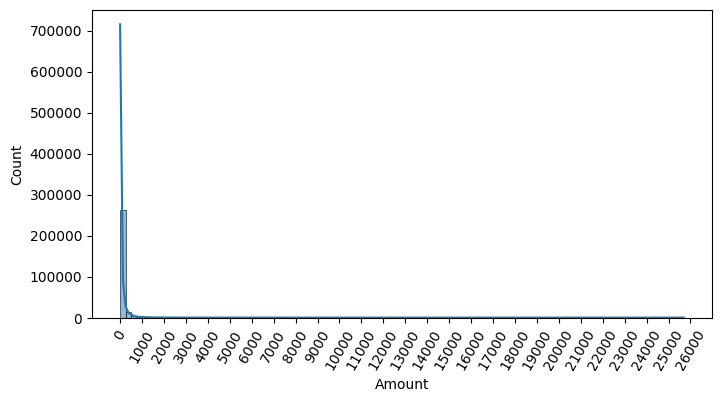

In [ ]:
# 중요 피처 값의 분포도 살펴보기
# Amount : 신용카드 사용 금액, 정상/사기 트랜잭션을 결정하는 중요 속성일 가능성 높음
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

카드 사용금액이 1000불 이하인 데이터가 대부분, 26,000불까지 드물지만 많은 금액을 사용한 경우가 발생하면서 꼬리가 긴 형태의 분포 곡선을 가짐

> Amount를 표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능 측정 (대부분의 선형 모델은 중요 피처들의 값이 정규분포 형태를 유지하는 것을 선호)

### **정규분포 형태로 피처(Amount)값 변환 - StandardScaler()**

In [ ]:
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

    # 변환된 Amount를 Amount_Scaled라는 이름으로 df 맨 앞에 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)

    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test =  get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,     F1: 0.7294, AUC:0.9706
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,     F1: 0.8409, AUC:0.9779


정규분포 형태로 Amount 피처값 변환 후 결과 로지스틱 회귀의 정밀도/재현율 저하, LightGBM도 약간 저하

### **로그 변환 - np.log1p()**

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    # np.log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    return df_copy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,     F1: 0.7120, AUC:0.9734
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,     F1: 0.8496, AUC:0.9796


## **이상치 데이터 제거 후 모델 학습/예측/평가**

![Outlier](https://blog.kakaocdn.net/dn/DMbEM/btrhA27JFpz/Uz8exbZ6DKnMAk58BxZEi1/img.png)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

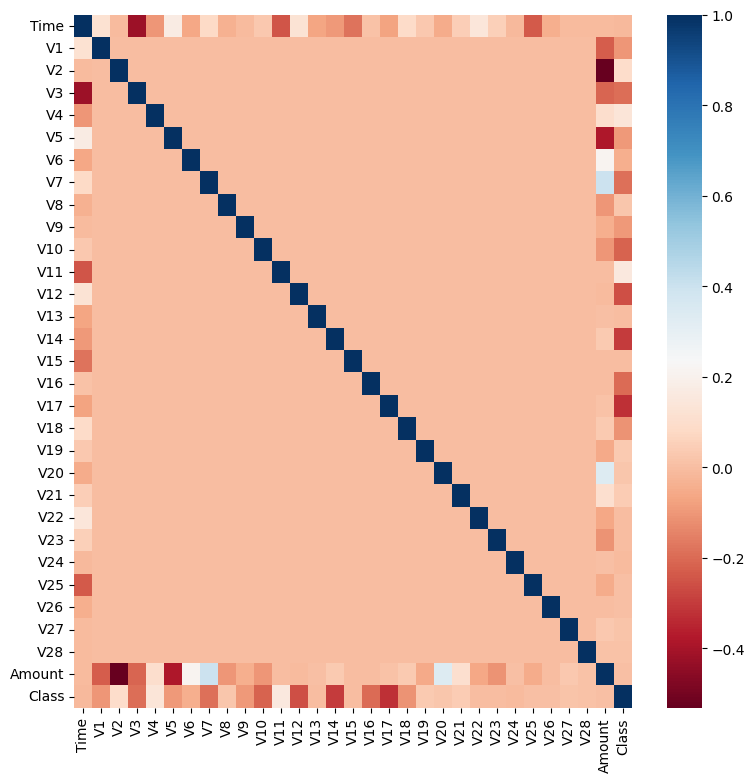

In [ ]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출 Q1, Q3를 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values, 75)

    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    # max, min을 벗어난 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# V14 칼럼에서 이상치 데이터 찾기 (총 4개)
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# get_processed_df()를 로그 변환 + V14 피처 이상치 데이터 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()

    # np.log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    # 이상치 데이터 삭제
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,     F1: 0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,     F1: 0.8897, AUC:0.9780


이상치 데이터 제거 후 로지스틱 회귀, LightGBM 모두 예측 성능이 크게 향상됨

### **SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [ ]:
# 로지스틱 회귀 모델 학습/예측/평가
lr_clf = LogisticRegression(max_iter=1000)

# 학습 데이터가 SMOTE 증식된 X_train_over, y_train_over로 변경됨
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247,     F1: 0.1022, AUC:0.9736


정밀도가 5.4%로 현저히 낮음

로지스틱 회귀 모델이 오버 샘플링으로 인해 실제 원본 데이터의 유형보다 너무 많은 Class=1인 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 1로 적용하였기 때문

In [ ]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축 : threshold 값, Y축 : precision/recall 값
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # label, legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


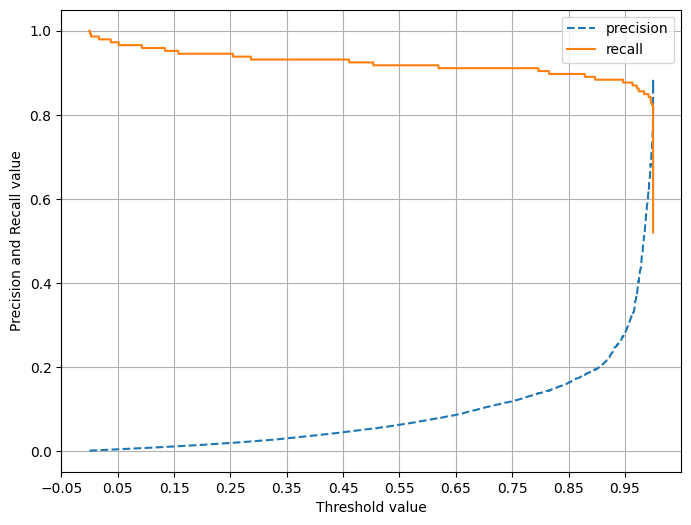

In [ ]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측 모델이 생성되지 못 함

> threshold 0.99 이하에서는 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대가 됨

> 분류 결정 임계값을 조정하더라도 올바른 재현율/정밀도 성능을 얻을 수 없음

In [ ]:
# LightGBM 모델을 SMOTE 오버 샘플링 데이터 세트로 학습/예측/평가
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_job=-1, boost_from_average=False, verbose=-1)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,     F1: 0.8794, AUC:0.9814


SMOTE를 적용하면 재현율은 높아지지만 정밀도는 낮아지는 것이 일반적